In [7]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

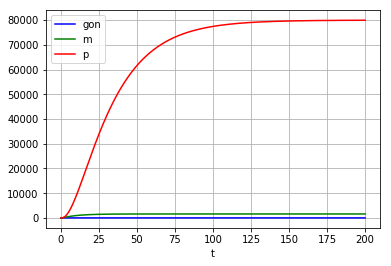

In [8]:
#ODE numerical integration skeleton

def ode_grad(c, t, kon, koff, gtot, am, bm, ap, bp):
    c_gon, c_m, c_p = c #Concentrations of species x, y, z
    
    dcdt = [
        #TODO: Return the ODE derivatives
        kon*(gtot-c_gon)-koff*c_gon, am*c_gon - bm*c_m, ap*c_m - bp*c_p
    ]
    
    return dcdt

#Reaction constants
kon = 0.8
koff = 0.2
am = 20
ap = 2
bm = 0.1
bp = 0.04
gtot = 10

#Time space initialization
t0 = 0
tn = 200
tsteps = 2001
t_space = np.linspace(t0, tn, tsteps)
#Initial species concentrations
gon0 = 0
m0 = 0
p0 = 0

c0 = [gon0, m0, p0]


#TODO: Solve the ODE using scipy.integrate.odeint
sol = odeint(ode_grad, c0, t_space, args=(kon, koff, gtot, am, bm, ap, bp))

#TODO: Write plot code to plot the obtained solution curve(s)
plt.plot(t_space, sol[:, 0], 'b', label='gon')
plt.plot(t_space, sol[:, 1], 'g', label='m')
plt.plot(t_space, sol[:, 2], 'r', label='p')
plt.legend (loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [9]:
#Gillespie simulation skeleton


n_iters = 10

#TODO: Initialize some structure to hold the gillespie simulation curves (the results), for later plotting
plot = []
#Reaction constants

kon = 0.8
koff = 0.2
am = 20
ap = 2
bm = 0.1
bp = 0.04
gtot = 10


for n_iter in range(0, n_iters) :
    time = []
    mrna = []
    protein = []
    geneon = []
    print('Iteration ' + str(n_iter))
    
    t = 0
    t_max = 200

    #Initial molecule counts for each species
    gon = 0
    m = 0
    p = 0

    while t < t_max :
        
        #TODO: Calculate the value of the kinetics of each reaction
        #rxn1 = goff -> gon
        #rxn2 = gon -> goff
        #rxn3 = gon -> gon + m
        #rxn4 = m -> m + p
        #rxn5 = m -> null
        #rxn6 = p -> null
        rxn1 = (gtot-gon) * kon
        rxn2 = gon * koff
        rxn3 = gon * am
        rxn4 = m * ap
        rxn5 = m * bm
        rxn6 = p * bp
        #TODO: Normalize each kinetics value by the sum of kinetics values
        rxntot = rxn1+rxn2+rxn3+rxn4+rxn5+rxn6
        prxn1 = rxn1 / rxntot
        prxn2 = rxn2 / rxntot
        prxn3 = rxn3 / rxntot
        prxn4 = rxn4 / rxntot
        prxn5 = rxn5 / rxntot
        prxn6 = rxn6 / rxntot
        
        #TODO: Randomly sample one of the reactions according to the normalized kinetics values (i.e. their probabilities)
        #TIP: Use numpy.random.choice
        nxt = np.random.choice(['rxn1', 'rxn2', 'rxn3', 'rxn4', 'rxn5', 'rxn6'], 1, p=[prxn1,prxn2,prxn3,prxn4,prxn5,prxn6])
        #TODO: Randomly sample the small increase in time, according to an exponential distribution
        #TIP: Use numpy.random.exponential
        
        dt = np.random.exponential(scale=1/rxntot)
        
        #TODO: Update molecule counts (the result of the randomly chosen reaction)
        if nxt == "rxn1":
            gon += 1
        if nxt == "rxn2":
            gon -= 1
        if nxt == "rxn3":
            m += 1
        if nxt == "rxn4":
            p += 1
        if nxt == "rxn5":
            m -= 1
        if nxt == "rxn6":
            p -= 1
        #TODO: Update time t according to the randomly samples time increase
        t += dt
        #TODO: Store the current values of time and molecule counts (for later plotting)
        time.append(t)
        mrna.append(m)
        protein.append(p)
        geneon.append(gon)
    #TODO: Store the completed gillespie iteration as one simulation curve (for later plotting)
    plot.append([time,mrna,protein,geneon])
    print ("DONE")


Iteration 0
DONE
Iteration 1
DONE
Iteration 2
DONE
Iteration 3
DONE
Iteration 4
DONE
Iteration 5
DONE
Iteration 6
DONE
Iteration 7
DONE
Iteration 8
DONE
Iteration 9
DONE


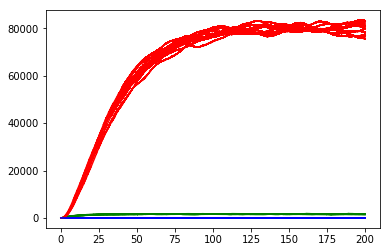

In [12]:
#TODO: Write plot code to plot all of the gillespie simulation curves
#Also plot the deterministic ODE solution (tip: plot using thicker line width or some other distinguishing trait)
#Also, the homework might ask you to plot other attrbutes in this plot as well!
for n in plot:
    plt.plot(n[0],n[1], 'g')
    plt.plot(n[0],n[2], 'r')
    plt.plot(n[0],n[3], 'b')

plt.show()

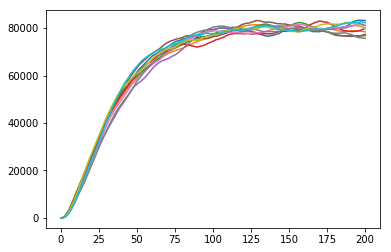

In [13]:
#standarize all the times into 1~201
norm_time = np.arange(0,201,1)
norm_protein_list = []
for n in plot:
    norm_protein = []
    count = 0
    for m in range(len(n[0])):
        if n[0][m] > count and count <= 200:
            norm_protein.append(n[2][m])
            count += 1
    norm_protein_list.append(np.asarray(norm_protein))

for n in norm_protein_list:
    plt.plot(norm_time, n)

plt.show()

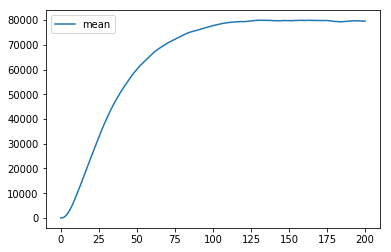

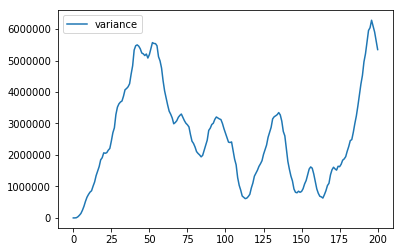

In [15]:
total = np.zeros(201)
for n in norm_protein_list:
    total += n
mean = total/10

variance = np.zeros(201)
for n in norm_protein_list:
    variance += (n - mean)**2
variance = variance/10

plt.plot(norm_time, mean, label="mean")
plt.legend()
plt.show()
plt.show()
plt.plot(norm_time, variance, label="variance")
plt.legend()
plt.show()